## Análisis de los programas políticos de las elecciones autonómicas 2015


En este notebook se va a realizar un análisis del contenido de los programas políticos presentados por 6 partidos en las elecciones autonómicas del año 2015. Los partidos políticos de los cuales se han analizado sus programas son:

+ Ciudadanos
+ Izquierda Unida
+ Podemos
+ Partido Popular
+ Partido Socialista Obrero Español
+ Unión, Progreso y Democracia

Debido a que algunos partidos no propusieron un programa generalizado para todas las Comunidades Autónomas, se han utilizado los prorgamas propuestos para la Comunidad de Madrid.



## Obtención de los datos
Los programas han sido obtenidos en formato PDF de las páginas web de los diferentes partidos.

Con la siguiente instrucción se realizará el listado de los documentos que se van a analizar.

In [1]:
ls data/autonomicas*.pdf

data/autonomicas_ciudadanos.pdf  data/autonomicas_pp.pdf
data/autonomicas_iu.pdf          data/autonomicas_psoe.pdf
data/autonomicas_podemos.pdf     data/autonomicas_upyd.pdf


#### Extraer el texto de los PDF

In [2]:
%%bash
# for i in autonomicas*.pdf ; do pdf2txt -o "$i.txt" "$i" ; done

In [3]:
! ls data/autonomicas*

data/autonomicas_ciudadanos.pdf  data/autonomicas_pp.pdf
data/autonomicas_ciudadanos.txt  data/autonomicas_pp.txt
data/autonomicas_iu.pdf		 data/autonomicas_psoe.pdf
data/autonomicas_iu.txt		 data/autonomicas_psoe.txt
data/autonomicas_podemos.pdf	 data/autonomicas_upyd.pdf
data/autonomicas_podemos.txt	 data/autonomicas_upyd.txt


## Tratamiento de los datos

Antes de seguir, debemos instalar el paquete **Cython** para poder instalar el paquete [Word Cloud](https://github.com/amueller/word_cloud).

In [4]:
%%bash
# pip install cython
# pip install git+git://github.com/amueller/word_cloud.git

#### Stopwords

Antes de nada, debemos quitar las palabras irrelevantes de los textos, denominadas **stopwords**. Para ello, utilizaremos el paquete [**nltk**](https://github.com/nltk/nltk) (Natural Language Toolkit).

In [5]:
%%bash
# pip install nltk

**Importamos los paquetes necesarios:**

In [6]:
from os import path
%pylab inline

import codecs, string
import matplotlib.pyplot as plt

import nltk

from wordcloud import WordCloud

Populating the interactive namespace from numpy and matplotlib


Hay que **descargar las stopwords** del lenguaje español, ya que es el que trataremos:

In [7]:
nltk.download("stopwords")
spanish_stopwords = set ( nltk.corpus.stopwords.words('spanish') )

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
spanish_stopwords

{u'a',
 u'al',
 u'algo',
 u'algunas',
 u'algunos',
 u'ante',
 u'antes',
 u'como',
 u'con',
 u'contra',
 u'cual',
 u'cuando',
 u'de',
 u'del',
 u'desde',
 u'donde',
 u'durante',
 u'e',
 u'el',
 u'ella',
 u'ellas',
 u'ellos',
 u'en',
 u'entre',
 u'era',
 u'erais',
 u'eran',
 u'eras',
 u'eres',
 u'es',
 u'esa',
 u'esas',
 u'ese',
 u'eso',
 u'esos',
 u'esta',
 u'estaba',
 u'estabais',
 u'estaban',
 u'estabas',
 u'estad',
 u'estada',
 u'estadas',
 u'estado',
 u'estados',
 u'estamos',
 u'estando',
 u'estar',
 u'estaremos',
 u'estar\xe1',
 u'estar\xe1n',
 u'estar\xe1s',
 u'estar\xe9',
 u'estar\xe9is',
 u'estar\xeda',
 u'estar\xedais',
 u'estar\xedamos',
 u'estar\xedan',
 u'estar\xedas',
 u'estas',
 u'este',
 u'estemos',
 u'esto',
 u'estos',
 u'estoy',
 u'estuve',
 u'estuviera',
 u'estuvierais',
 u'estuvieran',
 u'estuvieras',
 u'estuvieron',
 u'estuviese',
 u'estuvieseis',
 u'estuviesen',
 u'estuvieses',
 u'estuvimos',
 u'estuviste',
 u'estuvisteis',
 u'estuvi\xe9ramos',
 u'estuvi\xe9semos',


## Análisis de un programa

Vamos a analizar un único fichero de texto.

In [9]:
text = codecs.open('data/autonomicas_ciudadanos.txt', 'r', 'utf-8').read()

In [10]:
wordcloud = WordCloud().generate(text)

In [11]:
def showWordCloud (wc, title, size=(15,10)):
    plt.figure(figsize = size)
    plt.title(title)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

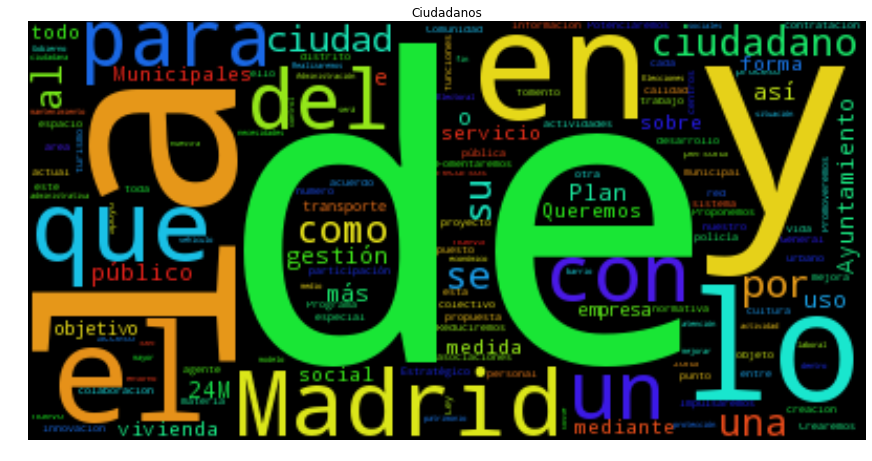

In [12]:
showWordCloud(wordcloud, "Ciudadanos")

Hemos descargado las **stopwords**, pero no las hemos utilizado

In [13]:
wordcloud = WordCloud(background_color="white", max_words=1000, stopwords = spanish_stopwords).generate(text)

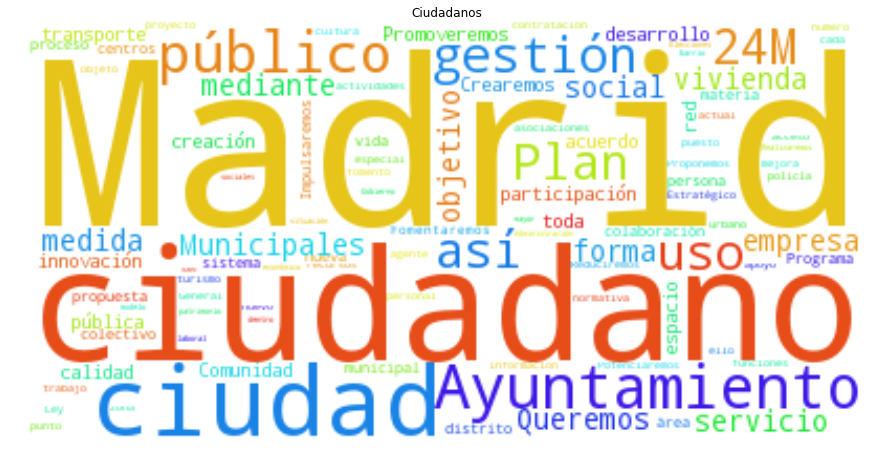

In [14]:
showWordCloud(wordcloud, "Ciudadanos")

Debido a que los programas electorales descargados son de Madrid, esta palabra va a salir muchas veces pero no es relevante, por lo que añadimos "Madrid" a la lista de stopwords.

In [15]:
spanish_stopwords.add(u'madrid')
spanish_stopwords

{u'a',
 u'al',
 u'algo',
 u'algunas',
 u'algunos',
 u'ante',
 u'antes',
 u'como',
 u'con',
 u'contra',
 u'cual',
 u'cuando',
 u'de',
 u'del',
 u'desde',
 u'donde',
 u'durante',
 u'e',
 u'el',
 u'ella',
 u'ellas',
 u'ellos',
 u'en',
 u'entre',
 u'era',
 u'erais',
 u'eran',
 u'eras',
 u'eres',
 u'es',
 u'esa',
 u'esas',
 u'ese',
 u'eso',
 u'esos',
 u'esta',
 u'estaba',
 u'estabais',
 u'estaban',
 u'estabas',
 u'estad',
 u'estada',
 u'estadas',
 u'estado',
 u'estados',
 u'estamos',
 u'estando',
 u'estar',
 u'estaremos',
 u'estar\xe1',
 u'estar\xe1n',
 u'estar\xe1s',
 u'estar\xe9',
 u'estar\xe9is',
 u'estar\xeda',
 u'estar\xedais',
 u'estar\xedamos',
 u'estar\xedan',
 u'estar\xedas',
 u'estas',
 u'este',
 u'estemos',
 u'esto',
 u'estos',
 u'estoy',
 u'estuve',
 u'estuviera',
 u'estuvierais',
 u'estuvieran',
 u'estuvieras',
 u'estuvieron',
 u'estuviese',
 u'estuvieseis',
 u'estuviesen',
 u'estuvieses',
 u'estuvimos',
 u'estuviste',
 u'estuvisteis',
 u'estuvi\xe9ramos',
 u'estuvi\xe9semos',


### Automatización

Tenemos varios archivos que analizar y no podemos perder el tiempo en hacerlos uno a uno, es conveniente definir una función que lo haga por nosotros:

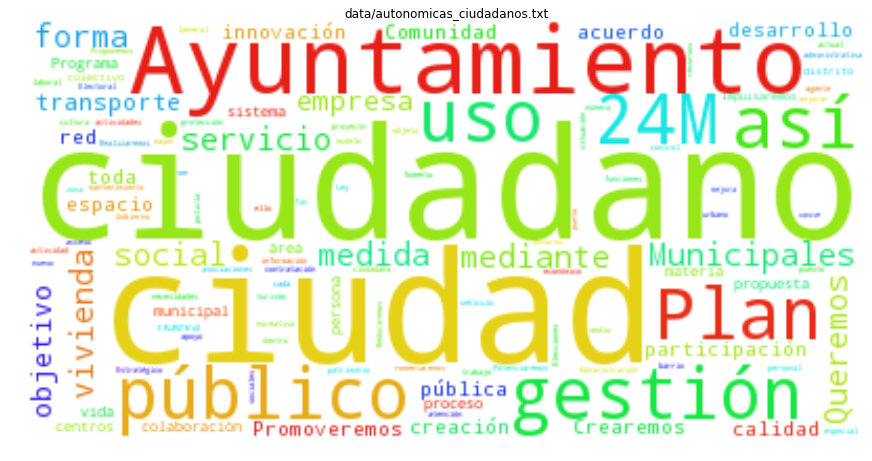

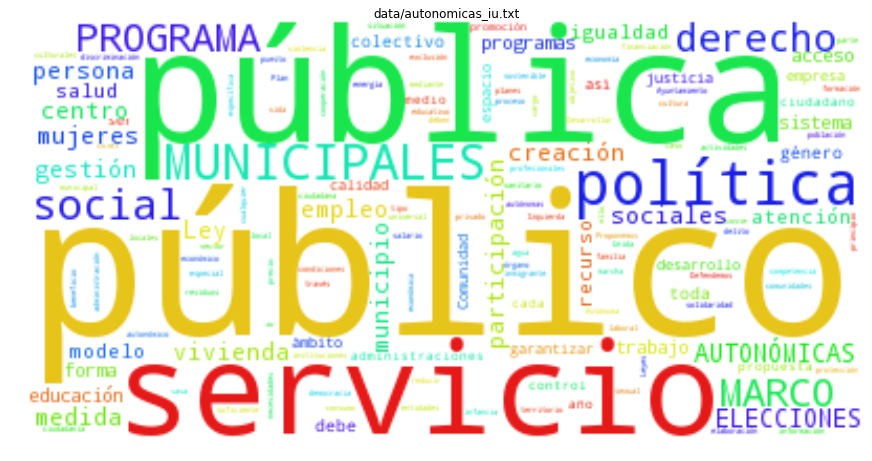

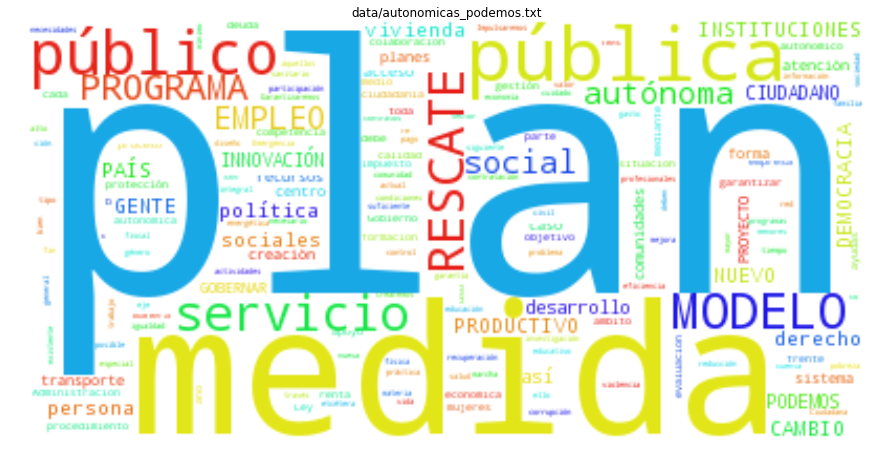

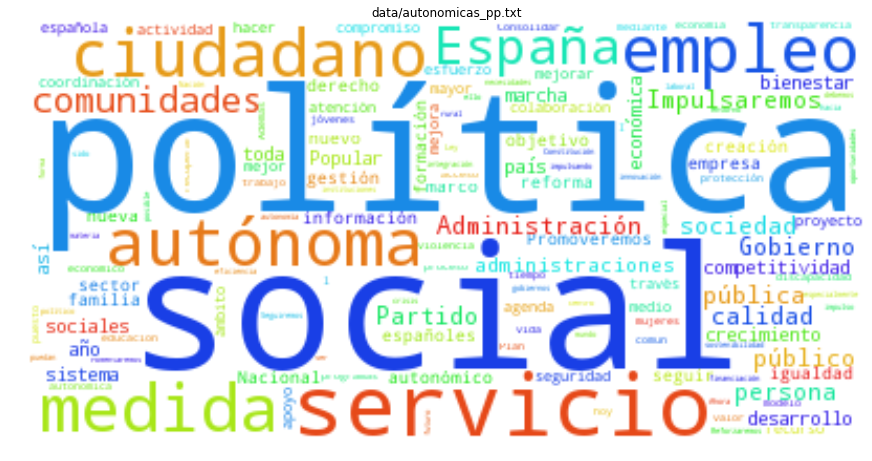

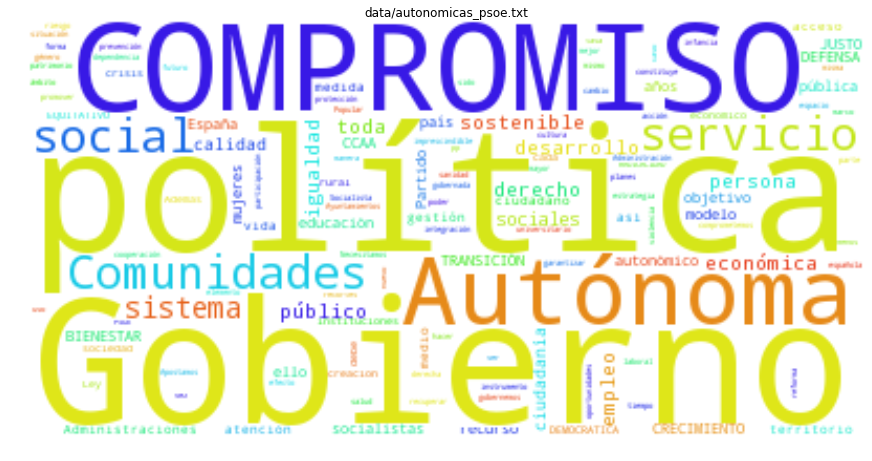

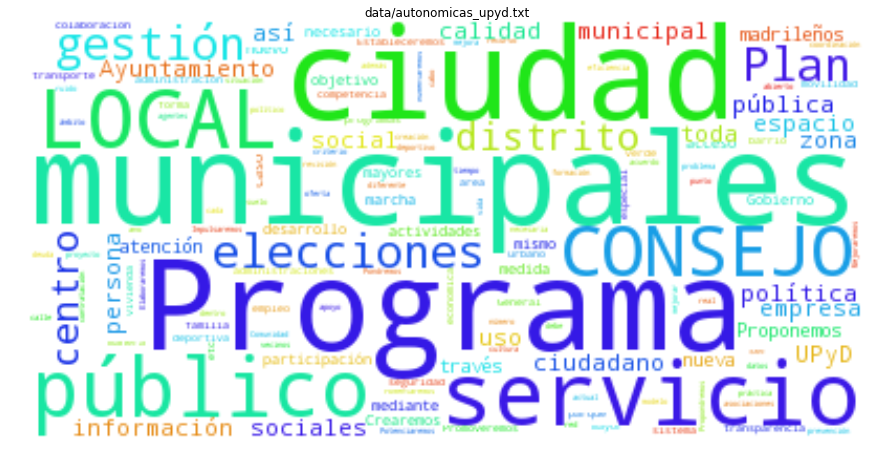

In [16]:
def analyzeDocuments():
    documents = !ls data/*.txt
    for document in documents:
        text = codecs.open(document, 'r', 'utf-8').read()
        wc = WordCloud(background_color="white", max_words=1000, stopwords = spanish_stopwords).generate(text)
        showWordCloud(wc, document)
        
analyzeDocuments()